**<u>Creating A Pokemon (Gen 6+) Types Table In R</u>**

&nbsp;

Hi there.

This page is about creating a Pokemon (Gen 6+) Types Table In R. The Fairy type is introduced in Gen 6 (XY) which is included in the plot. The reference I am using is http://pokemondb.net/type.


**<u>Table Of Contents</u>**

&nbsp;

* References
* A Pokemon Types Table (Gen 6+)
* Creating A Pokemon Types Table In R
* Creating The Pokemon Types Matrix Plot In R
* Using The Pokemon Types Matrix Plot


**<u>References</u>**

&nbsp;

* http://stackoverflow.com/questions/10232525/geom-tile-heatmap-with-different-high-fill-colours-based-on-factor
* http://stackoverflow.com/questions/16074440/r-ggplot2-center-align-a-multi-line-title
* http://docs.ggplot2.org/dev/vignettes/themes.html
* http://docs.ggplot2.org/current/theme.html
* https://scriptsandstatistics.wordpress.com/2017/03/30/how-to-plot-a-companion-planting-guide-using-ggplot2/
* http://pokemondb.net/type

**<u>A Pokemon Types Table (Gen 6+)</u>**

&nbsp;

The `geom_tile()` function from R's ggplot2 package allows for grid plots and tables.

In R you can make something as close to this:

<center><img src= "https://img.pokemondb.net/images/typechart.png"></center>

**<u>Creating A Pokemon Types Table In R</u>**

&nbsp;

We start with creating the table of Pokemon Types with their damage multipliers. In this page we include all the type including Dark, Steel and the Fairy type.

This first line of R code is for creating the Pokemon Types as a vector.

&nbsp;

In [7]:
# Reference: http://pokemondb.net/type

# Fairy type now included in Gen 6+:
# Chart Reference: https://img.pokemondb.net/images/typechart.png

pokemonTypes<- c("Normal", "Fire", "Water", "Electric", "Grass", "Ice",
 "Fighting", "Poison", "Ground", "Flying", "Psychic",
 "Bug", "Rock", "Ghost", "Dragon", "Dark", "Steel", "Fairy")

We check that this vector has a count of 18 for the 18 Pokémon types..

In [8]:
# Length of Vector / Number of Types in Pokemon Gen 6+:
length(pokemonTypes)

[1] 18

Since there are 18 Pokemon types, we would need 18 x 18 = 324 cases in our data table. These 324 cases translates to 324 rows in our table. The table could be inputted manually but that would take too long. Instead, the use of Cartesian products from the mathematical field of Set Theory along with R's `expand.grid()` function is applied. Please refer to the code and output below.

In [10]:
# Create Cartesian Product Type Table: 
# Attacker in Column 1 and Defender in Column 2

pokeTable <- expand.grid(pokemonTypes, pokemonTypes)
pokeTable <- as.data.frame(pokeTable)

We can check the dimensions of this Cartesian product table of Pokemon types.

In [11]:
# Check dimensions (18 x 18 = 324 combinations):

dim(pokeTable)

[1] 324   2

Instead of viewing the whole table (of 324 rows), the `head()` and `tail()` functions are used to view a sample of the table.

In [14]:
# Preview the table using head and tail functions:

head(pokeTable, n = 10)

tail(pokeTable, n = 10)

Var1,Var2
Normal,Normal
Fire,Normal
Water,Normal
Electric,Normal
Grass,Normal
Ice,Normal
Fighting,Normal
Poison,Normal
Ground,Normal
Flying,Normal


,Var1,Var2
315,Ground,Fairy
316,Flying,Fairy
317,Psychic,Fairy
318,Bug,Fairy
319,Rock,Fairy
320,Ghost,Fairy
321,Dragon,Fairy
322,Dark,Fairy
323,Steel,Fairy
324,Fairy,Fairy


An empty third column for Attack Damage multiplier is added. (NA means missing value)


In [15]:
# Add third (empty) Column for Attack Damage Mutliplier:

pokeTable[, 3] <- NA

The column titles are currently Var1 and Var2 with an unnamed third column name. The `colnames()` function is used to assign new column names.

In [16]:
# Rename column names:

colnames(pokeTable) <- c("Attack_Type", "Defense_Type", "Attack Damage Multiplier")

# Check #2:

head(pokeTable, n = 10)

Attack_Type,Defense_Type,Attack Damage Multiplier
Normal,Normal,NA
Fire,Normal,NA
Water,Normal,NA
Electric,Normal,NA
Grass,Normal,NA
Ice,Normal,NA
Fighting,Normal,NA
Poison,Normal,NA
Ground,Normal,NA
Flying,Normal,NA


**Filling In The Third Column**

This is the part where there is quite a bit of work. Because a third empty column was added there are 324 missing values denoted by NA. Each row where there is an attack type and defense type has to be dealt with separately. (There is no for/while loop solution here.)

If there is attack type advantage then the damage does normal damage (x1). This is denoted by 1 in the third column.

An attack type advantage over the defending Pokémon type results in double the damage applied from the attacking move to the defending Pokémon. This is denoted by 2 in the third column.

If there is an attack type which is not favourable against the defending Pokemon type results in half damage (x1/2). The attacking move was not very effective.

There are cases where certain attack types have no effect on the defending Pokemon type. The damage multiplier her is just 0.

Here is the full code for filling in the third column (Attack Damage Multiplier).

In [17]:
# Fill in third column accordingly:

# 1: Normal Damage, 1/2 Not Very Effective, 0 No effect
# 2 Super Effective

# 18 Per Row/Column

# Normal as Defending Pokemon:

pokeTable[1:18, 3] <- c(1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1)

# Fire as Defending Pokemon:

pokeTable[19:36, 3] <- c(1, 1/2, 2, 1, 1/2, 1/2, 1, 1, 2, 1, 1, 1/2, 2, 1, 1, 1, 1/2, 1/2)

# Water as Defending Pokemon:

pokeTable[37:54, 3] <- c(1, 1/2, 1/2, 2, 2, 1/2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1/2, 1)

# Electric as Defending Pokemon:

pokeTable[55:72, 3] <- c(1, 1, 1, 1/2, 1, 1, 1, 1, 2, 1/2, 1, 1, 1, 1, 1, 1, 1/2, 1)

# Grass as Defending Pokemon:

pokeTable[73:90, 3] <- c(1, 2, 1/2, 1/2, 1/2, 2, 1, 2, 1/2, 2, 1, 2, 1, 1, 1, 1, 1, 1)

# Ice as Defending Pokemon:

pokeTable[91:108, 3] <- c(1, 2, 1, 1, 1, 1/2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1)

# Fighting as Defending Pokemon:

pokeTable[109:126, 3] <- c(1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1/2, 1/2, 1, 1, 1/2, 1, 2)

# Poison as Defending Pokemon:

pokeTable[127:144, 3] <- c(1, 1, 1, 1, 1/2, 1, 1/2, 1/2, 2, 1, 2, 1/2, 1, 1, 1, 1, 1, 1/2)

# Ground as Defending Pokemon:

pokeTable[145:162, 3] <- c(1, 1, 2, 0, 2, 2, 1, 1/2, 1, 1, 1, 1, 1/2, 1, 1, 1, 1, 1)

# Flying as Defending Pokemon:

pokeTable[163:180, 3] <- c(1, 1, 1, 2, 1/2, 2, 1/2, 1, 0, 1, 1, 1/2, 2, 1, 1, 1, 1, 1)

# Psychic as Defending Pokemon:

pokeTable[181:198, 3] <- c(1, 1, 1, 1, 1, 1, 1/2, 1, 1, 1, 1/2, 2, 1, 2, 1, 2, 1, 1)

# Bug as Defending Pokemon:

pokeTable[199:216, 3] <- c(1, 2, 1, 1, 1/2, 1, 1/2, 1, 1/2, 2, 1, 1, 2, 1, 1, 1, 1, 1)

# Rock as Defending Pokemon:

pokeTable[217:234, 3] <- c(1/2, 1/2, 2, 1, 2, 1, 2, 1/2, 2, 1/2, 1, 1, 1, 1, 1, 1, 2, 1)

# Ghost as Defending Pokemon:

pokeTable[235:252, 3] <- c(0, 1, 1, 1, 1, 1, 0, 1/2, 1, 1, 1, 1/2, 1, 2, 1, 2, 1, 1)

# Dragon as Defending Pokemon:

pokeTable[253:270, 3] <- c(1, 1/2, 1/2, 1/2, 1/2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2)

# Dark as Defending Pokemon:

pokeTable[271:288, 3] <- c(1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1/2, 1, 1/2, 1, 2)

# Steel as Defending Pokemon:

pokeTable[289:306, 3] <- c(1/2, 2, 1, 1, 1/2, 1/2, 2, 0, 2, 1/2, 1/2, 1/2, 1/2, 1, 1/2, 1, 1/2, 1/2)

# Fairy as Defending Pokemon:

pokeTable[307:324, 3] <- c(1, 1, 1, 1, 1, 1, 1/2, 2, 1, 1, 1, 1/2, 1, 1, 0, 1/2, 2, 1)

This next piece of code involves having the values from the third column as factors. In addition, I check the structure of the table and use the `head()` and `tail()` functions.

In [19]:
# Have the multipliers in column 3 as factors:

pokeTable[, 3] <- as.factor(pokeTable[, 3])

# Check structure:

str(pokeTable)


'data.frame':	324 obs. of  3 variables:
 $ Attack_Type             : Factor w/ 18 levels "Normal","Fire",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Defense_Type            : Factor w/ 18 levels "Normal","Fire",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Attack Damage Multiplier: Factor w/ 4 levels "0","0.5","1",..: 3 3 3 3 3 3 4 3 3 3 ...
 - attr(*, "out.attrs")=List of 2
  ..$ dim     : int  18 18
  ..$ dimnames:List of 2
  .. ..$ Var1: chr  "Var1=Normal" "Var1=Fire" "Var1=Water" "Var1=Electric" ...
  .. ..$ Var2: chr  "Var2=Normal" "Var2=Fire" "Var2=Water" "Var2=Electric" ...


In [20]:
# Check #3:

head(pokeTable, n = 10)
 
tail(pokeTable, n = 10)

Attack_Type,Defense_Type,Attack Damage Multiplier
Normal,Normal,1
Fire,Normal,1
Water,Normal,1
Electric,Normal,1
Grass,Normal,1
Ice,Normal,1
Fighting,Normal,2
Poison,Normal,1
Ground,Normal,1
Flying,Normal,1


,Attack_Type,Defense_Type,Attack Damage Multiplier
315,Ground,Fairy,1
316,Flying,Fairy,1
317,Psychic,Fairy,1
318,Bug,Fairy,0.5
319,Rock,Fairy,1
320,Ghost,Fairy,1
321,Dragon,Fairy,0
322,Dark,Fairy,0.5
323,Steel,Fairy,2
324,Fairy,Fairy,1


**<u>Creating The Pokemon Types Matrix Plot In R</u>**

&nbsp

The table of Pokemon Types and damage multipliers is now ready for plotting purposes.

The ggplot2 package in R for data visualization is first loaded.

In [22]:
library(ggplot2)

Here is the code and output for the Pokemon types matrix plot. In this plot, the defending Pokemon types are on the x-axis (horizontal) and the attacking move type is on the y-axis (side/vertical).

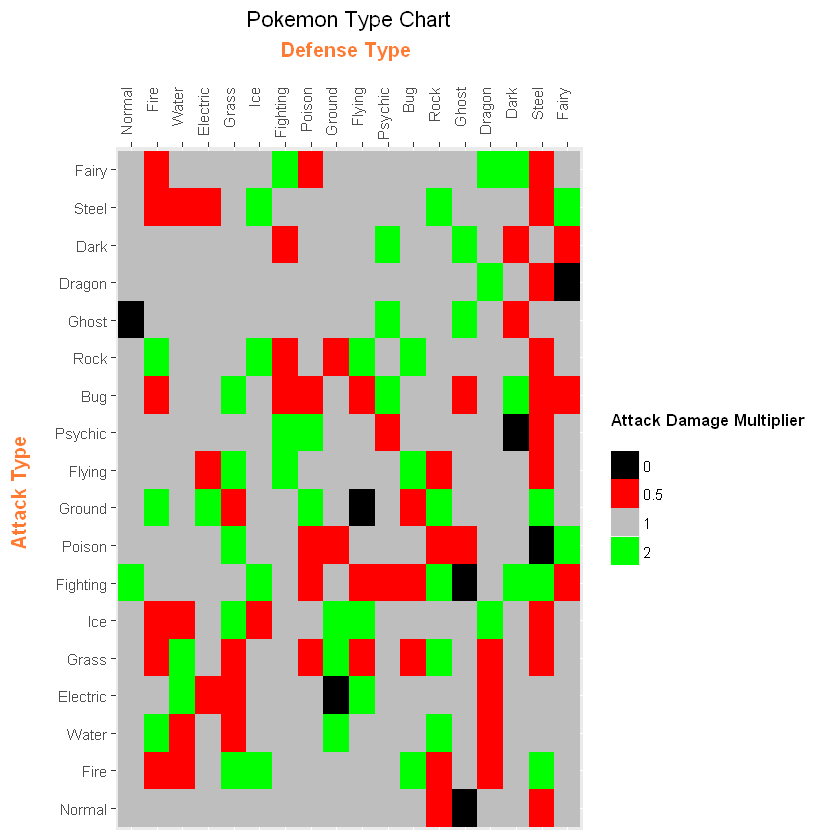

In [23]:
## Attack Type on x-axis and Defense Type on y-axis with x-axis labels on top:


ggplot(pokeTable,aes(x = pokeTable[, 2],y = pokeTable[, 1], fill = pokeTable[, 3])) + 
 geom_tile() + 
 scale_fill_manual(values = c('black', 'red','gray', "green")) +
 labs(x = "Defense Type \n", y = "Attack Type \n", 
 title = "Pokemon Type Chart", fill = "Attack Damage Multiplier \n") + 
 theme(plot.title = element_text(hjust = 0.5), 
 axis.title.x = element_text(face="bold", colour="#FF7A33", size = 12),
 axis.title.y = element_text(face="bold", colour="#FF7A33", size = 12),
 axis.text.x = element_text(angle = 90,vjust = 0.2, hjust = 1),
 legend.title = element_text(face="bold", size = 10)) +
 scale_x_discrete(position = "top")

**<u>Using The Pokemon Types Matrix Plot</u>**

&nbsp;

For this section, we will refer to the plot that was just shown.

Using this table is not too hard.

As an example, if the defending Pokemon type is a Rock type and the attacking move is a water type then the attack would double the normal damage as indicated by the green square.

&nbsp;

**Dual Typed Defending Pokemon Cases**

&nbsp;

There are dual-typed Pokemon tables out there but you could use the single type table twice. As an example, an Ice type move to a Grass and Water type would deal normal damage (x1) as we have the multipliers of 2 and 1/2.

&nbsp;

**Simple Table Observations**

&nbsp;

* One could use these types of tables to study type matchups for Pokemon selections in certain video games and competitions.

* The Steel Type is still a very solid defensive choice as a lot of attacks do half damage to Steel types.

* Poison as an attacking type is not very great despite its advantage over the Fairy type.

* It is somewhat difficult to pick out the best attacking types. Candidates include Ground, Fire, Ice and Rock types.

* The Fairy type is okay for attacking. Its defense is decent as Dark, Fighting and Bug attacks are not very effective versus Fairy types. Dragon attacks have no effect on Fairy types.

* Only Steel and Poison moves are super effective versus Fairy.

* The Fire type is a good defensive type as well.